# Центральная предельная теорема на примере Экспоненциального распределения

Экспоненциа́льное (или показа́тельное[1]) распределе́ние — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.

[Ссылка на wiki](https://ru.wikipedia.org/wiki/Экспоненциальное_распределение)

In [2]:
# импортируем библиотеки

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
%matplotlib inline

In [3]:
# Генерируем выборку объемом 1000 из Экспоненциального-распределения с параметром lambd = 1

lambd = 0.62
ex = sc.expon(lambd)
sample = ex.rvs(1000)

Строим гистограмму выборки и рисуем поверх неё теоретическую плотность распределения для нашей случайной величины (чтобы величины были в одном масштабе, указываем у гистограммы значение параметра density=True):

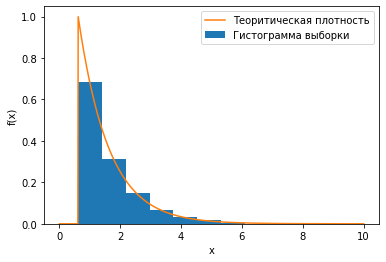

In [4]:
x = np.linspace(0, 10, 1000)
pdf = ex.pdf(x)

plt.hist(sample, density=True, label='Гистограмма выборки')
plt.plot(x, pdf, label='Теоритическая плотность')

# подписываем оси
plt.ylabel('f(x)')
plt.xlabel('x')

plt.legend()
plt.show()

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).


Математическое ожидание определяется по формуле:  1/lambd

Дисперсия определяется по формуле:  1/lambd**2

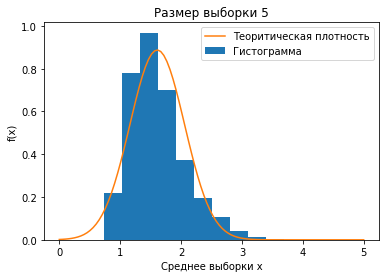

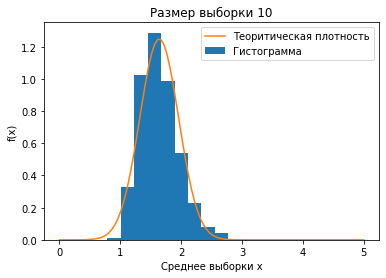

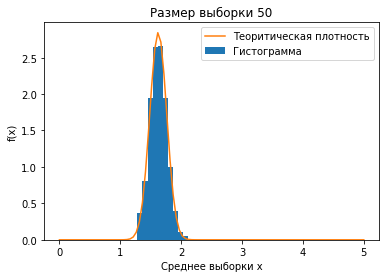

In [11]:
for n in [5, 10, 50]:
    
    # список из средних значений с помощью генератора списков
    means = [ex.rvs(n).mean() for i in range(1000)]
    
    # строим гистограмму
    plt.hist(means, density=True, label='Гистограмма')
    
    # вычисляем матожидание и дисперсию
    loc, scale = sc.norm.fit(means)
    
    #нормальное распределение
    norm = sc.norm(loc, scale)
    x = np.linspace(0, 5, 100)
    y = norm.pdf(x)
    
    # строим окончательный график
    plt.plot(x, y, label='Теоритическая плотность')
    plt.legend()
    plt.title("Размер выборки " + str(n))
    plt.ylabel('f(x)')
    plt.xlabel('Среднее выборки x')
    plt.show()

С ростом n точность нормальной аппроксимации увеличивается. 